The model addresses to predict if a customer will conclude his membership with a telecom company. The data was downloaded from kaggle. 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
#preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
# ensemble
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
## metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [6]:
import warnings
warnings.filterwarnings("ignore")

## Reading the data

In [7]:
data=pd.read_csv(r"C:\Users\Akshaya\Desktop\python-great lakes\practice files\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## About the data

In [9]:
data.describe()
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Exploring the data

In [10]:
pandas_profiling.ProfileReport(data)

Number of variables,21
Number of observations,7043
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,168.0 B
Numeric,2
Categorical,17
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [11]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

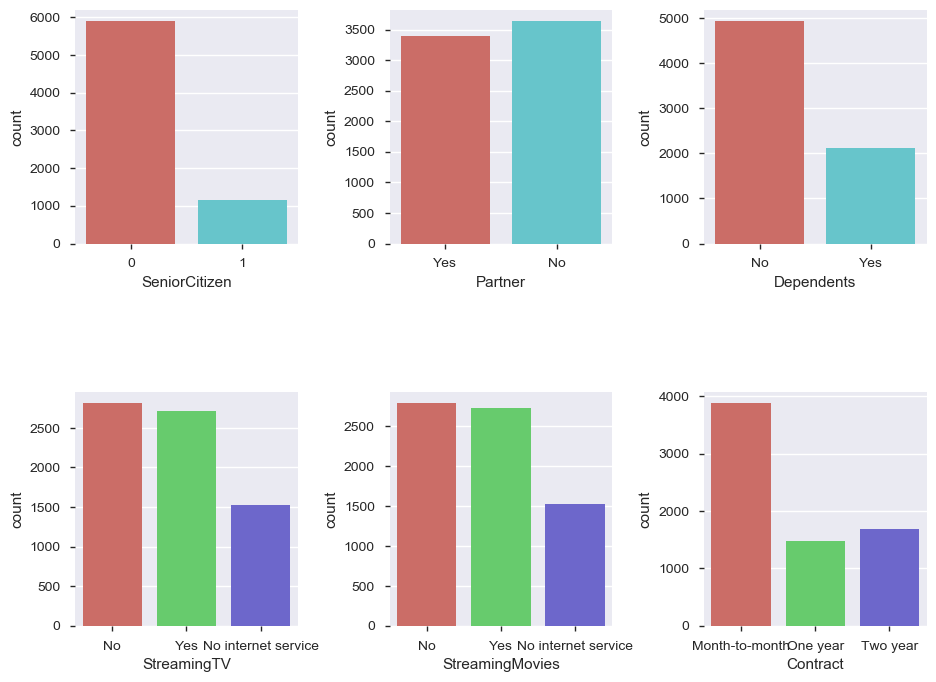

In [12]:
fig, axs = plt.subplots(3,2, figsize = (12,8)) 
ax1 = plt.subplot2grid((5,12), (0,0), rowspan=2, colspan=3) 
ax2 = plt.subplot2grid((5,12), (0,4), rowspan=2, colspan=3)
ax3 = plt.subplot2grid((5,12), (0,8), rowspan=2, colspan=3)
ax4 = plt.subplot2grid((5,12), (3,0), rowspan=2, colspan=3)
ax5 = plt.subplot2grid((5,12), (3,4), rowspan=2, colspan=3) 
ax6 = plt.subplot2grid((5,12), (3,8), rowspan=2, colspan=3)



sns.countplot('SeniorCitizen', data = data, ax=ax1,palette="hls")
sns.countplot('Partner', data = data, ax=ax2,palette="hls")
sns.countplot('Dependents', data = data, ax=ax3,palette="hls")
sns.countplot('StreamingTV', data = data, ax=ax4,palette="hls")
sns.countplot('StreamingMovies', data = data, ax=ax5,palette="hls")
sns.countplot('Contract', data = data, ax=ax6,palette="hls")

In [13]:
# The countplot helps us visualise and compare the number of subscribers in different categories.

No     5174
Yes    1869
Name: Churn, dtype: int64


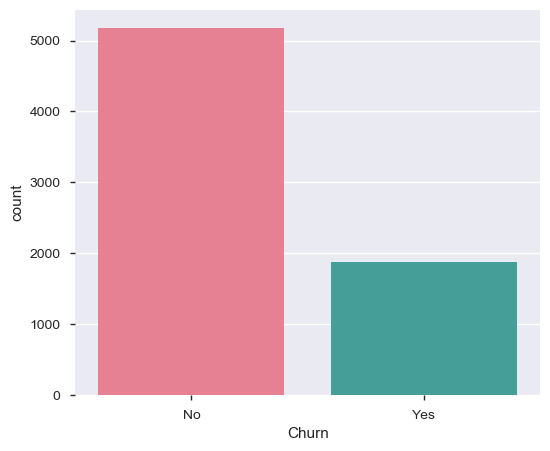

In [14]:
print(data['Churn'].value_counts())
plt.figure(figsize=(6,5))
sns.countplot(data["Churn"],palette="husl")

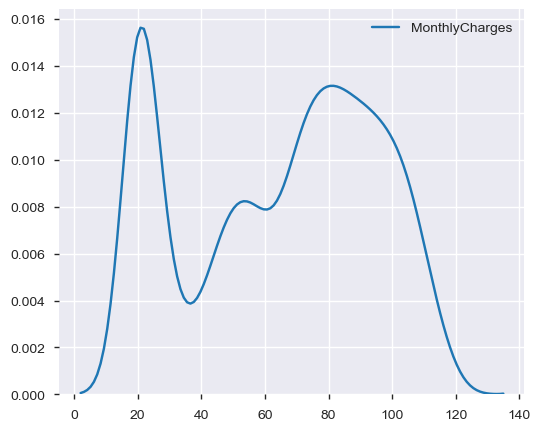

In [15]:
plt.figure(figsize=(6,5))
sns.kdeplot(data["MonthlyCharges"])
plt.show()

In [16]:
## the plot shows it is almost multi-modal.

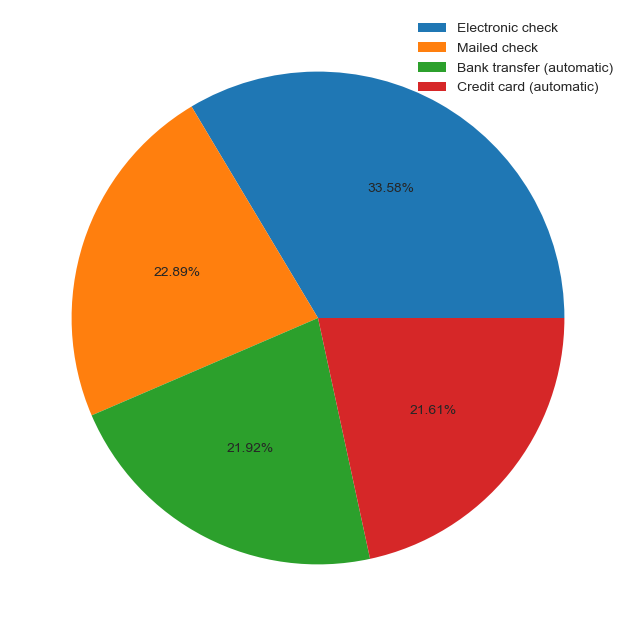

In [17]:
plt.figure(figsize=(8,8))
plt.pie(data["PaymentMethod"].value_counts(),autopct='%1.2f%%')
labels = data['PaymentMethod'].value_counts().index
plt.legend(labels,loc=0)

plt.show()

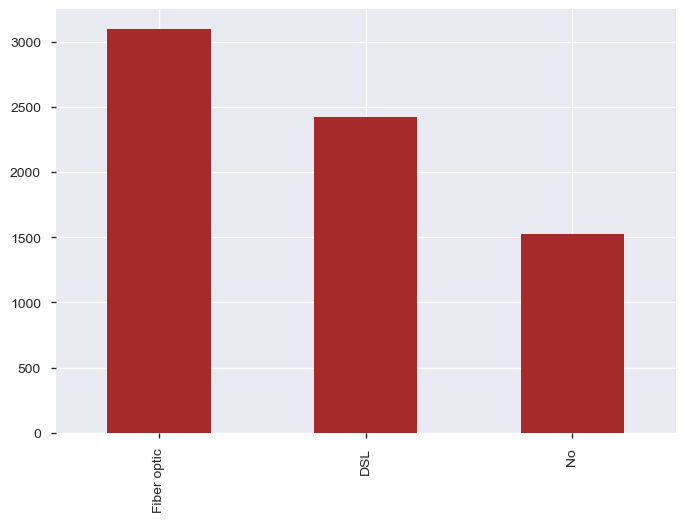

In [18]:
data['InternetService'].value_counts().plot(kind='bar',color='brown')

In [19]:
## Handling empty entries
data[data['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


11 values are empty in the column Total charges. We fill it with the average, because the proportion of the records is less and assuming it won't affect the overall distribution of total charges

In [20]:
data.loc[data['TotalCharges']==' ','TotalCharges']= np.nan

In [21]:
data['TotalCharges'].fillna(data['TotalCharges'].dropna().astype(float).mean(),inplace=True)

In [22]:
data['TotalCharges']=data['TotalCharges'].astype(float)

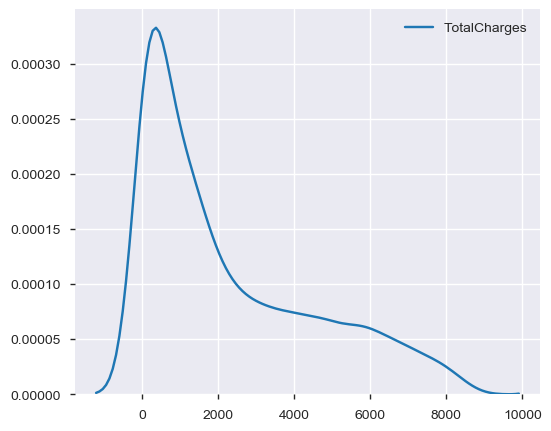

In [23]:
plt.figure(figsize=(6,5))
sns.kdeplot(data["TotalCharges"])
plt.show()

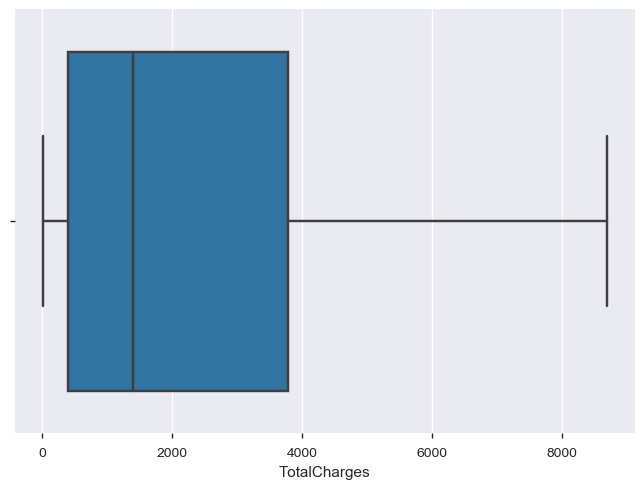

In [24]:
sns.boxplot(data['TotalCharges'])

The data is right skewed. But there aren't any outliers by detecting with IQR method.

In [25]:
data.groupby('gender')['TotalCharges'].mean()

gender
Female    2283.191142
Male      2283.407680
Name: TotalCharges, dtype: float64

In [26]:
data.groupby('gender')['MonthlyCharges'].mean()

gender
Female    65.204243
Male      64.327482
Name: MonthlyCharges, dtype: float64

In [27]:
## Surprisingly both men and women have almost the same average charges.

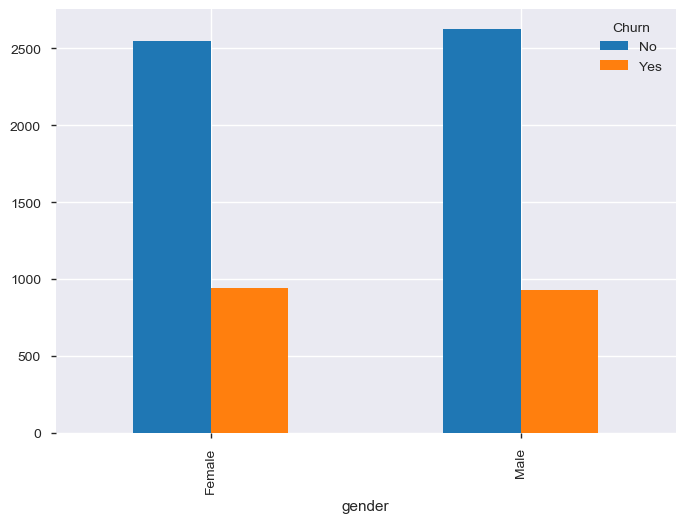

In [28]:
pd.crosstab(data['gender'],columns=data['Churn']).plot(kind='bar')

In [29]:
## Visually there is not much of a difference in the churn rate based on gender.

In [30]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [31]:
## Label Encoding for columns :'SeniorCitizen', 'Partner', 'Dependents','PhoneService','PaperlessBilling'

le=preprocessing.LabelEncoder()    # label encoding
for i in ['SeniorCitizen', 'Partner', 'Dependents','PhoneService','PaperlessBilling']:
    
    data[i]=le.fit_transform(data[i]) 


In [32]:
data1=pd.get_dummies(data,columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'],drop_first=True)

In [33]:
data1=data1.drop('customerID',axis=1)

In [34]:
data1['gender']=le.fit_transform(data1['gender'])

In [35]:
## Splitting the data into X and y, train and test

X=data1.drop("Churn",axis=1)
y=data1.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Models:

In [36]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(criterion='entropy',random_state=0),
    DecisionTreeClassifier(criterion='gini',random_state=0),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(),
    GaussianNB()]

In [37]:
for i in classifiers:
    
    classifier = i
    classifier.fit(X_train, y_train)
    y_pred=classifier.predict(X_test)
    print(i,"\n")
    print("accuracy train:",classifier.score(X_train,y_train),"\n")
    print("accuracy test:",classifier.score(X_test,y_test),"\n")
    print('***************************************')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

accuracy train: 0.8036511156186612 

accuracy test: 0.8102224325603408 

***************************************
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best') 

accuracy train: 0.9983772819472616 

accuracy test: 0.7307146237576905 

***************************************
DecisionTreeClassifier(class_weight=None

All models suffer from either bias or variance error. Hence we try to ensemble them. Random Forest has already been applied, other ensemble techniques are applied below

In [38]:
## Bagging
for i in classifiers:
    model = BaggingClassifier(base_estimator=i)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)

    print(i,"\n")
    print("accuracy train:",model.score(X_train,y_train),"\n")
    print("accuracy test:",model.score(X_test,y_test),"\n")
    print('***************************************')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

accuracy train: 0.8062880324543611 

accuracy test: 0.8130619971604354 

***************************************
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best') 

accuracy train: 0.9809330628803246 

accuracy test: 0.7785139611926172 

***************************************
DecisionTreeClassifier(class_weight=None

The results have not improved much after bagging. Hence we proceed to try and apply boosting to atleast work on models like Logistic Regression.

In [39]:
## Ada-Boosting

model = AdaBoostClassifier(classifiers[1])
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print("accuracy train:",model.score(X_train,y_train),"\n")
print("accuracy test:",model.score(X_test,y_test),"\n")

accuracy train: 0.9983772819472616 

accuracy test: 0.7524846190250828 



In [40]:
## Gradient Boosting
model= GradientBoostingClassifier(n_estimators=150, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('train score', model.score(X_train,y_train))
print('test score', model.score(X_test,y_test))

train score 0.8237322515212981
test score 0.7979176526265973


Logistic Regression is performing well on training data after ada boosting but, variance is high.

For the future, the hyper parameters can be tuned to see if the performance improves, other boosting techniques may also be applied.Methods such as stacking may also be applied.